## Project Code
### Goals:

*   to predict heart/stroke problems, they are indicated as variables LAHCA7 and LAHCA8 respectively.
*   to identify some variables you think would be relevant and trying out some summary using pandas, for example, get the percentage of categorical variables(ethnicity, marital status), average for continuous variables(age, income, etc), or plotting


#### Import packages and code

In [2]:
import pandas as pd
import numpy as np
import IPython 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
persons_data = pd.read_csv('https://raw.githubusercontent.com/MaxShalom/arise/master/personsx1.csv', delimiter = ',')
persons_data.head()

,FPX,AGE_CHG,INTV_QRT,SEX,NOWAF,FSPOUS2,COHAB1,COHAB2,FCOHAB3,ASTATFLG,CSTATFLG,FMX,RRP,FRRP,ORIGIN_I,HISPAN_I,RACRECI3,QCADULT,QCCHILD,R_MARITL,MRACRPI2,RACERPI2,HISCODI3,MRACBPI2,AGE_P,HHREFLG,RECTYPE,SRVY_YR,FMREFLG,FMRPFLG,PARENTS,DAD_DEGP,MOM_DEGP,SIB_DEGP,CDCMSTAT,DAD_ED,MOM_ED,FMOTHER1,FFATHER1,HHX,...,MAFLG,CHFLG,OPFLG,OGFLG,WHONAM1,WHONAM2,NOTCOV,PRPLPLUS,PWRKBR1,COVER,COVER65O,COVER65,REGIONBR,WHYNOWKP,GEOBRTH,YRSINUS,CITIZENP,DOINGLWP,WRKLYR1,WRKHRS2,PLBORN,HEADST,HEADSTV1,ARMFVER,ARMFEV,ARMFFC,VACOV,WRKFTALL,WRKMYR,HIEMPOF,EDUC1,ERNYR_P,ARMFTM7P,ARMFTM1P,ARMFTM2P,ARMFTM3P,ARMFTM4P,ARMFTM5P,ARMFTM6P,ENGLANG
0,1,NaN,1,1,NaN,NaN,NaN,NaN,NaN,1,NaN,1,1,1,2,12,3,NaN,NaN,4,11,4,4,7,75,P,20,2018,P,B,4,NaN,NaN,NaN,5,NaN,NaN,0,0,9,...,NaN,NaN,NaN,NaN,1.0,NaN,2,2.0,NaN,NaN,1.0,1.0,1,3.0,1,NaN,1,5,2,NaN,1,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,NaN,1,1,NaN,2.0,NaN,NaN,NaN,1,NaN,1,1,1,2,12,1,NaN,NaN,1,1,1,2,1,68,P,20,2018,P,B,4,NaN,NaN,NaN,3,NaN,NaN,0,0,20,...,NaN,NaN,NaN,NaN,1.0,NaN,2,2.0,NaN,NaN,1.0,1.0,1,3.0,1,NaN,1,5,2,NaN,1,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1,NaN,1,1,NaN,NaN,NaN,NaN,NaN,1,NaN,1,1,1,2,12,2,NaN,NaN,4,2,2,3,2,76,P,20,2018,P,B,4,NaN,NaN,NaN,5,NaN,NaN,0,0,21,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,2.0,2.0,1,3.0,1,NaN,1,5,2,NaN,1,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,1,NaN,1,2,NaN,NaN,NaN,NaN,NaN,1,NaN,1,1,1,2,12,1,NaN,NaN,4,1,1,2,1,67,P,20,2018,P,B,4,NaN,NaN,NaN,5,NaN,NaN,0,0,22,...,NaN,NaN,NaN,NaN,1.0,NaN,2,2.0,NaN,NaN,1.0,1.0,1,9.0,1,NaN,1,5,2,NaN,1,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,1,NaN,1,1,NaN,NaN,NaN,NaN,NaN,1,NaN,1,1,1,2,12,1,NaN,NaN,5,1,1,2,1,65,P,20,2018,P,B,4,NaN,NaN,NaN,2,NaN,NaN,0,0,24,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,4.0,5.0,1,NaN,1,NaN,1,1,1,40.0,1,NaN,NaN,NaN,1,1.0,NaN,NaN,4.0,2.0,14,2.0,NaN,2.0,2.0,1.0,1.0,NaN,NaN,1


#### Sex count 
1 = Male, 2 = Female

In [4]:
persons_data.groupby("SEX").count()

,FPX,AGE_CHG,INTV_QRT,NOWAF,FSPOUS2,COHAB1,COHAB2,FCOHAB3,ASTATFLG,CSTATFLG,FMX,RRP,FRRP,ORIGIN_I,HISPAN_I,RACRECI3,QCADULT,QCCHILD,R_MARITL,MRACRPI2,RACERPI2,HISCODI3,MRACBPI2,AGE_P,HHREFLG,RECTYPE,SRVY_YR,FMREFLG,FMRPFLG,PARENTS,DAD_DEGP,MOM_DEGP,SIB_DEGP,CDCMSTAT,DAD_ED,MOM_ED,FMOTHER1,FFATHER1,HHX,WTIA,...,MAFLG,CHFLG,OPFLG,OGFLG,WHONAM1,WHONAM2,NOTCOV,PRPLPLUS,PWRKBR1,COVER,COVER65O,COVER65,REGIONBR,WHYNOWKP,GEOBRTH,YRSINUS,CITIZENP,DOINGLWP,WRKLYR1,WRKHRS2,PLBORN,HEADST,HEADSTV1,ARMFVER,ARMFEV,ARMFFC,VACOV,WRKFTALL,WRKMYR,HIEMPOF,EDUC1,ERNYR_P,ARMFTM7P,ARMFTM1P,ARMFTM2P,ARMFTM3P,ARMFTM4P,ARMFTM5P,ARMFTM6P,ENGLANG
SEX,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4208,0,4208,2356,2020,230,145,230,4208,0,4208,4208,4208,4208,4208,4208,2,0,4208,4208,4208,4208,4208,4208,2542,4208,4208,2578,2431,4208,279,484,55,4208,0,0,4208,4208,4208,4208,...,6,0,0,0,1652,63,4208,1635,203,2356,1852,1852,4208,3225,4208,449,4208,4208,4208,975,4208,0,0,12,4208,1305,924,380,1143,918,4208,1143,216,1039,1234,1216,1035,698,368,4208
2,5080,0,5080,2581,1841,243,154,243,5080,0,5080,5080,5080,5080,5080,5080,6,0,5080,5080,5080,5080,5080,5080,3248,5080,5080,3286,3442,5080,152,309,76,5080,0,0,5080,5080,5080,5080,...,14,0,4,0,2086,75,5080,2065,203,2581,2499,2499,5080,4161,5080,669,5080,5080,5080,962,5080,0,0,3,5080,99,75,452,1095,880,5080,1095,7,90,84,80,47,22,11,5080


#### Value count of disease types
`LAHCA7`: Persons 18+ years who have at least one limitation due to a heart problem<br> 


Heart problem causes limitation:


> 1 - Mentioned <br>
2 - Not mentioned<br>
7 - Refused<br>
8 - Not ascertained<br>
9 - Don't know





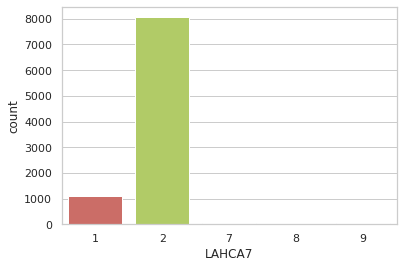

In [5]:
persons_data["LAHCA7"].unique()
persons_data["LAHCA7"].value_counts()
sns.countplot(x="LAHCA7",data=persons_data,palette="hls")
plt.show()
persons_data_sub=persons_data.loc[persons_data['LAHCA7'] <=2]

In [6]:
persons_data.groupby("LAHCA7").count()

,FPX,AGE_CHG,INTV_QRT,SEX,NOWAF,FSPOUS2,COHAB1,COHAB2,FCOHAB3,ASTATFLG,CSTATFLG,FMX,RRP,FRRP,ORIGIN_I,HISPAN_I,RACRECI3,QCADULT,QCCHILD,R_MARITL,MRACRPI2,RACERPI2,HISCODI3,MRACBPI2,AGE_P,HHREFLG,RECTYPE,SRVY_YR,FMREFLG,FMRPFLG,PARENTS,DAD_DEGP,MOM_DEGP,SIB_DEGP,CDCMSTAT,DAD_ED,MOM_ED,FMOTHER1,FFATHER1,HHX,...,MAFLG,CHFLG,OPFLG,OGFLG,WHONAM1,WHONAM2,NOTCOV,PRPLPLUS,PWRKBR1,COVER,COVER65O,COVER65,REGIONBR,WHYNOWKP,GEOBRTH,YRSINUS,CITIZENP,DOINGLWP,WRKLYR1,WRKHRS2,PLBORN,HEADST,HEADSTV1,ARMFVER,ARMFEV,ARMFFC,VACOV,WRKFTALL,WRKMYR,HIEMPOF,EDUC1,ERNYR_P,ARMFTM7P,ARMFTM1P,ARMFTM2P,ARMFTM3P,ARMFTM4P,ARMFTM5P,ARMFTM6P,ENGLANG
LAHCA7,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1103,0,1103,1103,414,456,46,36,46,1103,0,1103,1103,1103,1103,1103,1103,0,0,1103,1103,1103,1103,1103,1103,722,1103,1103,727,700,1103,28,50,8,1103,0,0,1103,1103,1103,...,2,0,1,0,412,17,1103,405,33,414,689,689,1103,978,1103,121,1103,1103,1103,133,1103,0,0,1,1103,236,168,69,163,120,1103,163,40,187,230,235,208,146,77,1103
2,8062,0,8062,8062,4453,3351,415,259,415,8062,0,8062,8062,8062,8062,8062,8062,6,0,8062,8062,8062,8062,8062,8062,4998,8062,8062,5065,5101,8062,400,734,118,8062,0,0,8062,8062,8062,...,18,0,3,0,3275,119,8062,3244,371,4453,3609,3609,8062,6323,8062,982,8062,8062,8062,1767,8062,0,0,13,8062,1149,814,746,2037,1642,8062,2037,179,927,1071,1042,862,565,297,8062
7,53,0,53,53,32,25,4,1,4,53,0,53,53,53,53,53,53,2,0,53,53,53,53,53,53,34,53,53,35,32,53,1,3,2,53,0,0,53,53,53,...,0,0,0,0,26,1,53,26,0,32,21,21,53,37,53,2,53,53,53,15,53,0,0,0,53,8,7,5,16,15,53,16,2,6,7,8,5,4,2,53
8,17,0,17,17,12,9,1,0,1,17,0,17,17,17,17,17,17,0,0,17,17,17,17,17,17,11,17,17,11,12,17,1,3,0,17,0,0,17,17,17,...,0,0,0,0,10,1,17,10,0,12,5,5,17,8,17,1,17,17,17,9,17,0,0,0,17,2,2,3,9,9,17,9,0,2,2,2,1,0,0,17
9,53,0,53,53,26,20,7,3,7,53,0,53,53,53,53,53,53,0,0,53,53,53,53,53,53,25,53,53,26,28,53,1,3,3,53,0,0,53,53,53,...,0,0,0,0,15,0,53,15,2,26,27,27,53,40,53,12,53,53,53,13,53,0,0,1,53,9,8,9,13,12,53,13,2,7,8,9,6,5,3,53


#### Data.unique 

In [7]:
persons_data_sub.loc[persons_data_sub['LAHCA7'] == 2, 'LAHCA7'] = 0
persons_data_sub["LAHCA7"].unique()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


array([1, 0])

#### Data groups (mean, describe)



In [8]:
persons_data_sub.groupby('LAHCA7').mean()

,FPX,AGE_CHG,INTV_QRT,SEX,NOWAF,FSPOUS2,COHAB1,COHAB2,FCOHAB3,ASTATFLG,CSTATFLG,FMX,RRP,FRRP,ORIGIN_I,HISPAN_I,RACRECI3,QCADULT,QCCHILD,R_MARITL,MRACRPI2,RACERPI2,HISCODI3,MRACBPI2,AGE_P,RECTYPE,SRVY_YR,PARENTS,DAD_DEGP,MOM_DEGP,SIB_DEGP,CDCMSTAT,DAD_ED,MOM_ED,FMOTHER1,FFATHER1,HHX,WTIA,WTFA,INTV_MON,...,MAFLG,CHFLG,OPFLG,OGFLG,WHONAM1,WHONAM2,NOTCOV,PRPLPLUS,PWRKBR1,COVER,COVER65O,COVER65,REGIONBR,WHYNOWKP,GEOBRTH,YRSINUS,CITIZENP,DOINGLWP,WRKLYR1,WRKHRS2,PLBORN,HEADST,HEADSTV1,ARMFVER,ARMFEV,ARMFFC,VACOV,WRKFTALL,WRKMYR,HIEMPOF,EDUC1,ERNYR_P,ARMFTM7P,ARMFTM1P,ARMFTM2P,ARMFTM3P,ARMFTM4P,ARMFTM5P,ARMFTM6P,ENGLANG
LAHCA7,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.517738,NaN,2.355867,1.555073,1.997081,1.592659,1.426506,2.795367,1.674699,1.318035,NaN,1.011039,2.217068,2.044158,1.897792,11.080005,1.285413,1.0,NaN,3.700323,1.678244,1.426197,2.160010,2.153560,60.266807,20.0,2018.0,3.789878,1.200000,1.083106,1.389831,3.318903,NaN,NaN,0.148102,0.080005,27584.910816,3896.152890,4232.544406,6.051848,...,1.0,NaN,1.0,NaN,1.687939,1.369748,1.978789,2.236436,2.617251,1.980013,2.181214,2.602106,1.586331,5.675154,1.242248,4.821792,1.050112,4.173034,1.767055,34.847765,1.129744,NaN,NaN,1.307692,1.865666,1.494343,1.653563,1.896783,10.732941,1.566991,15.417514,19.963181,1.77095,1.991370,1.995331,1.860845,1.566125,1.757522,1.723906,1.267924
1,1.473255,NaN,2.327289,1.480508,1.997585,1.614035,1.217391,2.777778,1.608696,1.330916,NaN,1.006346,2.078876,2.015413,1.919311,11.270172,1.317316,NaN,NaN,3.475068,1.750680,1.500453,2.216682,2.204896,67.620127,20.0,2018.0,3.889393,1.214286,1.160000,1.500000,3.293744,NaN,NaN,0.080689,0.040798,27113.267452,3864.845875,4071.953762,5.943790,...,1.0,NaN,1.0,NaN,1.572816,1.352941,1.970988,2.175309,1.909091,2.099034,2.168360,2.589260,1.435177,5.378323,1.213055,4.900826,1.030825,4.556664,1.870354,34.022556,1.109701,NaN,NaN,1.000000,1.786038,1.491525,1.654762,1.884058,12.914110,1.816667,14.697189,18.417178,1.52500,2.117647,2.043478,1.846809,1.581731,1.719178,1.584416,1.261106


In [9]:
persons_data[["LAHCA7", "LAHCA8"]].describe()

,LAHCA7,LAHCA8
count,9288.000000,9288.000000
mean,1.960702,2.026055
std,0.778096,0.735485
min,1.000000,1.000000
25%,2.000000,2.000000
50%,2.000000,2.000000
75%,2.000000,2.000000
max,9.000000,9.000000


#### Value counts

In [43]:
persons_data["LAHCA7"].value_counts()
persons_data["LAHCA8"].value_counts()

2    8669
1     496
7      53
9      53
8      17
Name: LAHCA8, dtype: int64

#### Marital status for heart diseases

Marital Status:

> 1 - Married - spouse in household<br>
2 - Married - spouse not in household<br>
3 - Married - spouse in household unknown<br>
4 - Widowed<br>
5 - Divorced<br>
6 - Separated<br>
7 - Never married<br>
8 - Living with partner<br>
9 - Unknown marital status<br>


Text(0, 0.5, 'Frequency of Marital Status')

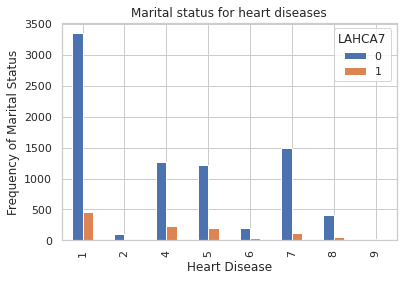

In [12]:
pd.crosstab(persons_data_sub.R_MARITL,persons_data_sub.LAHCA7).plot(kind='bar')
plt.title('Marital status for heart diseases')
plt.xlabel('Heart Disease')
plt.ylabel('Frequency of Marital Status')

#### Marital data by different disease groups

In [13]:
pd.crosstab(persons_data.LAHCA7, persons_data.R_MARITL).apply(lambda r: r/r.sum(), axis=1)

R_MARITL,1,2,4,5,6,7,8,9
LAHCA7,,,,,,,,
1,0.413418,0.009973,0.215775,0.179510,0.031732,0.106981,0.041704,0.000907
2,0.415654,0.012404,0.157901,0.150459,0.025056,0.184818,0.051476,0.002233
7,0.471698,0.018868,0.094340,0.132075,0.018868,0.150943,0.075472,0.037736
8,0.529412,0.058824,0.176471,0.000000,0.000000,0.176471,0.058824,0.000000
9,0.377358,0.018868,0.075472,0.132075,0.075472,0.188679,0.132075,0.000000


#### Alcohol abuse data by different disease groups

In [34]:
pd.crosstab(persons_data.LAHCA7, persons_data.LAHCA29_).apply(lambda r: r/r.sum(), axis=1)

LAHCA29_,1,2,7,8,9
LAHCA7,,,,,
1,0.000000,1.000000,0.0,0.0,0.0
2,0.002109,0.997891,0.0,0.0,0.0
7,0.000000,0.000000,1.0,0.0,0.0
8,0.000000,0.000000,0.0,1.0,0.0
9,0.000000,0.000000,0.0,0.0,1.0


#### Health insurance data by different disease groups `<65`
Under 65 years old
> 1 - Private <br>
2 - Medicaid and other public <br>
3 - Other coverage<br>
4 - Uninsured<br>
5 - Don't know 

In [ ]:
pd.crosstab(persons_data.LAHCA7, persons_data.COVER).apply(lambda r: r/r.sum(), axis=1)

COVER,1.0,2.0,3.0,4.0,5.0
LAHCA7,,,,,
1,0.301932,0.391304,0.214976,0.089372,0.002415
2,0.396811,0.338873,0.159668,0.096789,0.007860
7,0.437500,0.281250,0.156250,0.031250,0.093750
8,0.750000,0.166667,0.083333,0.000000,0.000000
9,0.076923,0.538462,0.153846,0.153846,0.076923


#### Health insurance data by different disease groups `>65`
65 years old and over
> 1 - Private <br>
2 - Medicaid and other public <br>
3 - Other coverage<br>
4 - Uninsured<br>
5 - Don't know 

In [41]:
pd.crosstab(persons_data.LAHCA7, persons_data.COVER65).apply(lambda r: r/r.sum(), axis=1)

COVER65,1.0,2.0,3.0,4.0,5.0,6.0,7.0
LAHCA7,,,,,,,
1,0.359942,0.142235,0.185776,0.175617,0.133527,0.002903,0.000000
2,0.352452,0.126905,0.226378,0.164589,0.121917,0.005542,0.002217
7,0.523810,0.047619,0.000000,0.238095,0.095238,0.000000,0.095238
8,0.200000,0.000000,0.200000,0.400000,0.200000,0.000000,0.000000
9,0.407407,0.037037,0.148148,0.185185,0.185185,0.000000,0.037037


#### Private health insurance data by different disease groups 
Private health insurance recode
> 1 - Yes, information<br>
2 - Yes, but no information<br>
3 - No<br>
7 - Refused<br>
8 - Not ascertained<br>
9 - Don't know<br>

In [42]:
pd.crosstab(persons_data.LAHCA7, persons_data.HIKINDNA).apply(lambda r: r/r.sum(), axis=1)

HIKINDNA,1,2,7,9
LAHCA7,,,,
1,0.328196,0.670898,0.000907,0.000000
2,0.374969,0.619449,0.001364,0.004217
7,0.509434,0.377358,0.075472,0.037736
8,0.588235,0.411765,0.000000,0.000000
9,0.264151,0.679245,0.000000,0.056604


#### Born in the US data by different disease groups 
Born in the United States
> 1 - Yes <br>
2 - No<br>
7 - Refused<br>
8 - Not ascertained<br>
9 - Don't know 

In [46]:
pd.crosstab(persons_data.LAHCA7, persons_data.PLBORN).apply(lambda r: r/r.sum(), axis=1)

PLBORN,1,2,7,9
LAHCA7,,,,
1,0.890299,0.109701,0.000000,0.00000
2,0.877078,0.121806,0.000496,0.00062
7,0.943396,0.037736,0.018868,0.00000
8,0.941176,0.058824,0.000000,0.00000
9,0.773585,0.226415,0.000000,0.00000


#### Education data by different disease groups 
Highest education level
> 00-14 - High School and below<br>15-18 - College<br>19-21 - Graduate and Above

In [47]:
pd.crosstab(persons_data.LAHCA7, persons_data.EDUC1).apply(lambda r: r/r.sum(), axis=1)

EDUC1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,97,99
LAHCA7,,,,,,,,,,,,,,,,,,,,,,,,
1,0.004533,0.002720,0.001813,0.006346,0.007253,0.00544,0.014506,0.008160,0.033545,0.033545,0.032638,0.038078,0.028105,0.050771,0.265639,0.198549,0.073436,0.034451,0.093382,0.043518,0.009066,0.005440,0.000000,0.009066
2,0.008683,0.001116,0.002853,0.004341,0.003845,0.00707,0.012280,0.007938,0.022947,0.024312,0.030265,0.038452,0.027164,0.043165,0.269784,0.180848,0.076284,0.037212,0.121558,0.046763,0.008559,0.010419,0.003349,0.010791
7,0.018868,0.000000,0.000000,0.018868,0.000000,0.00000,0.000000,0.000000,0.000000,0.018868,0.056604,0.000000,0.018868,0.000000,0.226415,0.169811,0.094340,0.037736,0.113208,0.113208,0.000000,0.000000,0.056604,0.056604
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.117647,0.176471,0.058824,0.117647,0.058824,0.411765,0.000000,0.000000,0.000000,0.000000
9,0.018868,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.018868,0.037736,0.037736,0.037736,0.037736,0.056604,0.283019,0.207547,0.056604,0.000000,0.037736,0.075472,0.037736,0.000000,0.018868,0.037736


#### Full-time working data by different disease groups 
Usually work full time
> 1 - Yes <br>
2 - No <br>
7 - Refused <br>
8 - Not ascertained <br>
9 - Don't know <br>

In [49]:
pd.crosstab(persons_data.LAHCA7, persons_data.WRKFTALL).apply(lambda r: r/r.sum(), axis=1)

WRKFTALL,1.0,2.0,9.0
LAHCA7,,,
1,0.115942,0.884058,0.000000
2,0.131367,0.864611,0.004021
7,0.000000,1.000000,0.000000
8,0.666667,0.333333,0.000000
9,0.222222,0.777778,0.000000


#### Statistical variables of dataset

In [14]:
persons_data_analysis = persons_data_sub[['ENGLANG', 'PSSRR', 'EDUC1',
                      'CITIZENP','PLBORN', 'HIKINDNA', 'LAHCA29_', 'R_MARITL', 'AGE_P', 
                      'MRACRPI2', 'SEX', 'WTFA','LAHCA7']]
percent_missing = persons_data_analysis.isnull().sum() * 100 / len(persons_data_analysis)
missing_value_persons_data = pd.DataFrame({'column_name': persons_data_analysis.columns,
                                 'percent_missing': percent_missing})
missing_value_persons_data.sort_values('percent_missing', inplace=True)
print(missing_value_persons_data)


         column_name  percent_missing
ENGLANG      ENGLANG              0.0
PSSRR          PSSRR              0.0
EDUC1          EDUC1              0.0
CITIZENP    CITIZENP              0.0
PLBORN        PLBORN              0.0
HIKINDNA    HIKINDNA              0.0
LAHCA29_    LAHCA29_              0.0
R_MARITL    R_MARITL              0.0
AGE_P          AGE_P              0.0
MRACRPI2    MRACRPI2              0.0
SEX              SEX              0.0
WTFA            WTFA              0.0
LAHCA7        LAHCA7              0.0


In [15]:
X = persons_data_analysis.loc[:, persons_data_analysis.columns != 'LAHCA7']
y = persons_data_analysis.loc[:, persons_data_analysis.columns == 'LAHCA7']

In [16]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.354418
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.036     
Dependent Variable: LAHCA7           AIC:              6520.4878 
Date:               2020-08-09 16:10 BIC:              6605.9656 
No. Observations:   9165             Log-Likelihood:   -3248.2   
Df Model:           11               LL-Null:          -3369.2   
Df Residuals:       9153             LLR p-value:      1.3268e-45
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
ENGLANG        0.0202    0.0474   0.4267  0.6696  -0.0727   0.1132
PSSRR         -0.0723    0.0499  -1.4491  0.1473  -0.1701   0.

#### Logistic regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.1, random_state=0)
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       817
           1       0.00      0.00      0.00       100

    accuracy                           0.89       917
   macro avg       0.45      0.50      0.47       917
weighted avg       0.79      0.89      0.84       917



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Calculated mean by different groups and age
`LAHCA7`: Persons 18+ years who have at least one limitation due to a heart problem<br> 


Heart problem causes limitation:


> 1 - Mentioned <br>
2 - Not mentioned<br>
7 - Refused<br>
8 - Not ascertained<br>
9 - Don't know


In [32]:
persons_data.groupby('LAHCA7')['AGE_P'].mean()

LAHCA7
1    67.620127
2    60.266807
7    57.905660
8    59.705882
9    62.056604
Name: AGE_P, dtype: float64

#### Calculated mean by different incomes
Total earnings last year
> 01 - $01-$4,999 <br>
02 - $5,000-$9,999 <br>
03 - $10,000-$14,999 <br>
04 - $15,000-$19,999 <br>
05 - $20,000-$24,999 <br>
06 - $25,000-$34,999 <br>
07 - $35,000-$44,999 <br>
08 - $45,000-$54,999 <br>
09 - $55,000-$64,999 <br>
10 - $65,000-$74,999 <br>
11 - $75,000 and over <br>
97 - Refused <br>
98 - Not ascertained <br>
99 - Don't know  <br>

In [45]:
persons_data.groupby('LAHCA7')['ERNYR_P'].median()

LAHCA7
1     6.0
2     6.0
7    97.0
8     8.0
9     6.0
Name: ERNYR_P, dtype: float64

#### Calculated mean by different language levels
How well English is spoken
> 1 - Very well <br>
2 - Well<br>
3 - Not well<br>
4 - Not at all<br>
7 - Refused<br>
8-  Not ascertained<br>
9 - Don’t know <br>

In [48]:
persons_data.groupby('LAHCA7')['ENGLANG'].median()

LAHCA7
1    1
2    1
7    1
8    1
9    1
Name: ENGLANG, dtype: int64

#### Scatterplot by group and compare differences of age

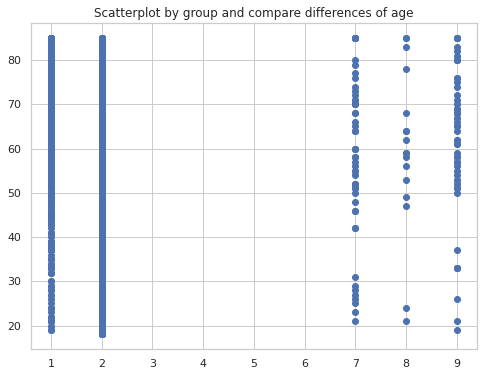

In [21]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(persons_data.LAHCA7, persons_data.AGE_P, cmap='tab20b')
plt.title('Scatterplot by group and compare differences of age')
plt.show()

#### Histogram of Ages

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3c65850f0>,
      dtype=object)

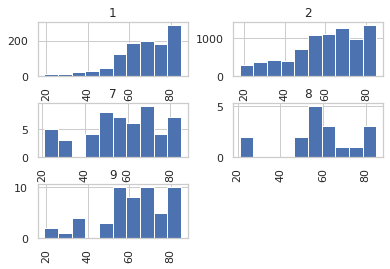

In [27]:
persons_data['AGE_P'].hist(by=persons_data['LAHCA7'])